In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

In [5]:
from tensorflow.keras.models import load_model

model = load_model(os.path.join('models/peko.tflite/'))

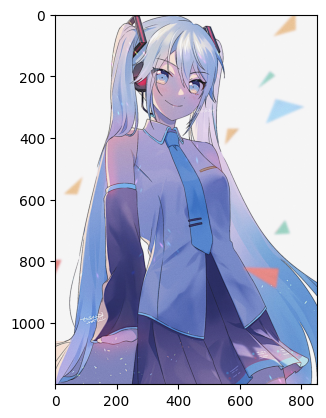

In [22]:
img = cv2.imread('test-images/sfw_1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

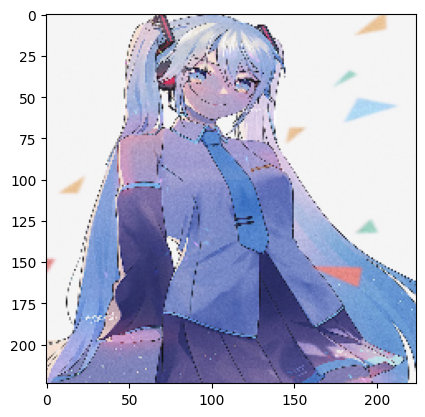

In [23]:
resize = tf.image.resize(img, (224, 224))
resize = resize[..., ::-1]  # Convert from BGR to RGB
plt.imshow(resize.numpy().astype(int))
plt.show()

In [24]:
test_image = np.expand_dims(resize/255, 0)
print(test_image.shape)
yhat = model.predict(test_image)
print(yhat)
print(['NSFW', 'SFW'][int(yhat.round())])

(1, 224, 224, 3)
1/1 [==============================] - 0s 69ms/step
[[0.9993503]]
SFW
